In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
ds = xr.open_dataset('GLDAS_NOAH025_M_EP.A202010.021.nc4')

In [3]:
da = xr.open_dataarray('air.mon.mean.nc',decode_times=True)

## XARRAY FUNCTIONALITY: OVERVIEW

### How Xarray functionality differs from Pandas
- Dimensions
     - Pandas: numbered (e.g., axis = 0, axis = 1)
       - Dimension order matters 
     - Xarray: named (e.g., latitude, longitude, time, height)
       - And variables can have different numbers of dimensions!
       - And dimension order doesn't matter for many operations 
       
### Advantages of Xarray (generally)
- Like Pandas, can use universal functions- vectorized/broacasting operations ftw!
  - but now broadast by *dimension name*
<br><br>
- Aligns indices during operations, too
<br><br>
- And can do normal arithmetic operations, etc.
<br><br>
- And many operations that can be done in Pandas!

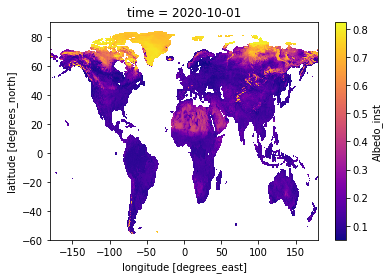

In [4]:
# Let's convert albedo from a percentage to a fraction (which is the more traditional representation)
cmap = cm.get_cmap(name='plasma')
(ds['Albedo_inst']/100.0).plot(cmap=cmap)

## EXAMPLES OF HANDY FUNCTIONALITY FOR SPATIAL DATA

### (1) Filtering 
   - only analyzing or plotting values that meet a certain condition 
   - can be helpful in data cleaning - filter out unphysical values 
   - *da.where(condition, other(opt))* - default value for 'other' is NaN

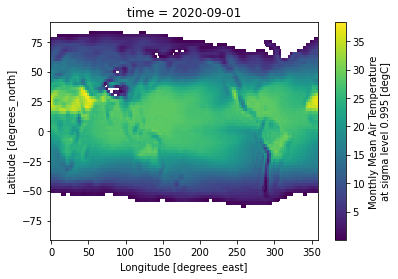

In [5]:
# Only consider temperature values above freezing
da3 = da.where(da>0)

# Can use Numpy indexing, carefully!  But must know dimension order of the data structure
da3[-1,:,:].plot() # Most recent time

### (2) Calculating the gradient of a quantity 
   - change in space or time, aka the derivative
   - *da.differentiate(coord)*

In [6]:
                                      # our monthly data is actually in DAY units 
                                      # time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 
dadt = da.differentiate(coord='time',datetime_unit='D')

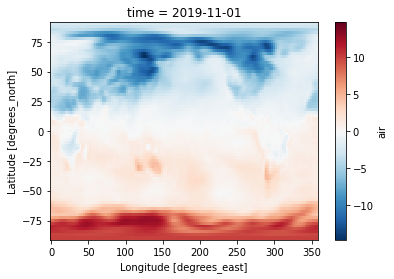

In [7]:
dadt = dadt*30  # dadt is a daily rate, and we want temp change per month

p = dadt.sel(time='2019-11-01').plot()

### (3)  'Coarsening' spatial data
   -  allows for block aggregations
   - *da.coarsen(dim1=...,dim2=...)*

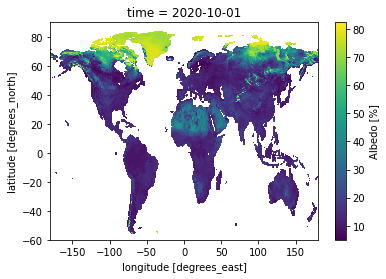

In [8]:
# What albedo looks like before coarsening
ds['Albedo_inst'].plot()

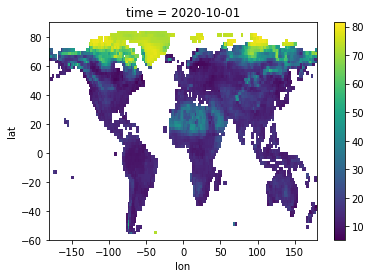

In [9]:
# What albedo looks like after coarsening
                                             # since we have NaNs!
ds['Albedo_inst'].coarsen(lat=8,lon=8).mean(skipna=True).plot()

### (4) Other functionality
   - apply functions
   - weighted operations
   - and many more!